<center><h2> Assignment 3

#### Import Required Python Packages

In [1]:
import pandas as pd
import numpy as np
import wbgapi as wb
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import scipy.optimize as opt

#### Get the data into Pandas DataFrame

In [2]:
country_codes = ['CAN'] 

country_names = {
                "CAN": 'Canada', 
                }
country_groups = {
    "Canada": 'High',
        }

In [3]:
indicator_ids = ["NY.GDP.MKTP.KD.ZG", "NY.GDP.PCAP.KD.ZG"]


In [4]:
def get_data(country_codes):
    
    """
    Get the data using world bank API into Pandas DataFrame
    """
    
    data  = wb.data.DataFrame(indicator_ids, country_codes, mrv=30) # most recent 30 years

    df = data.reset_index()

    df["series"].replace({"NY.GDP.MKTP.KD.ZG": "GDP growth", "NY.GDP.PCAP.KD.ZG": "GDP per capita"}, inplace=True)
    df.columns = ['Year', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', 
                    '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009','2010', 
                    '2011', '2012','2013','2014','2015','2016','2017','2018', '2019', '2020']

    ## Reshape data to get in required format
    df = df.transpose()
    df.columns = df.iloc[0]
    df = df[1:].reset_index()
    ### Returns data in original and transposed format
    return data, df

In [5]:
## Data in original format
get_data("CAN")[0]

,YR1963,YR1964,YR1965,YR1966,YR1967,YR1968,YR1969,YR1998,YR1999,YR2000,...,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019,YR2020
series,,,,,,,,,,,,,,,,,,,,,
NY.GDP.MKTP.KD.ZG,5.349546,6.642894,6.316714,6.704992,3.091206,4.995667,5.045456,2.796542,3.970483,4.917763,...,3.146881,1.762223,2.329123,2.870036,0.659177,1.001394,3.039880,2.777041,1.879592,-5.233024
NY.GDP.PCAP.KD.ZG,3.405213,4.650755,4.409518,4.735676,1.252817,3.315250,3.626733,1.946955,3.128792,3.945219,...,2.142309,0.663248,1.253614,1.841026,-0.089286,-0.135843,1.811279,1.335564,0.426918,-6.319222


In [6]:
## get GDP data in transposed format
df1 = get_data("CAN")[1]
df1.head()

Year,index,GDP growth,GDP per capita
0,1991,5.349546,3.405213
1,1992,6.642894,4.650755
2,1993,6.316714,4.409518
3,1994,6.704992,4.735676
4,1995,3.091206,1.252817


In [7]:
### Convert datatpe Year and GDP growth to numerical datatype
df1['index'] = df1["index"].astype(int)
df1["GDP growth"] = df1["GDP growth"].astype(float)

### K-means Clustering

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
scaler = StandardScaler()
data_rescale = scaler.fit_transform(df1)

In [10]:
data_rescale[:5, :]

array([[-1.67524673,  0.86050562,  0.61887384],
       [-1.55971247,  1.36129293,  1.12638458],
       [-1.44417822,  1.23499519,  1.02808971],
       [-1.32864396,  1.38533716,  1.16098634],
       [-1.2131097 , -0.01392901, -0.25814488]])

In [11]:
from sklearn.cluster import KMeans

In [12]:
def ElbowPlot(X, k_min, k_max):
    
    """
    Ebowplot, creating multiple K-means models and computing sum of squares for each model to select the best one
    """
    
    wss = [ ]
    for i in range(k_min, k_max+1):
        kmeans = KMeans(n_clusters = i, random_state = 2600)
        kmeans.fit(X)
        wss.append(kmeans.inertia_)
    plt.figure(figsize=(15,5))
    plt.plot(range(k_min, k_max+1), wss, '-o')
    plt.title('Elbow plot to find best number of clusters')
    plt.xlabel('Number of cluster k')
    plt.ylabel('Within group Sum of Square')
    plt.show()

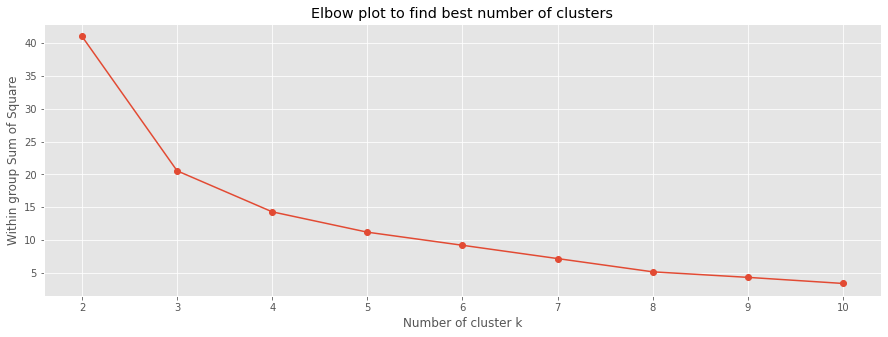

In [13]:
### Elbow plot to find best number of clusters
ElbowPlot(data_rescale, k_min = 2, k_max = 10)

[1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 2 0 0 0 0 0 0 0 0 0 0 2]
[[ 0.84725122 -0.40521243 -0.38057925]
 [-0.76541446  0.65277335  0.64507949]
 [ 1.03980832 -2.79091224 -2.8771604 ]]


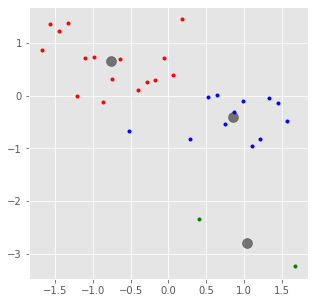

In [14]:
import sklearn.cluster as cluster


### Create 3 clusters 
kmeans = cluster.KMeans(n_clusters=3)
# Fit the data, results are stored in the kmeans object
kmeans.fit(data_rescale) # fit done on x,y pairs
labels = kmeans.labels_
print(labels) # labels is the number of the associated clusters of (x,y)␣
#points
# extract the estimated cluster centres
cen = kmeans.cluster_centers_
print(cen)
# plot using the labels to select colour
plt.figure(figsize=(5.0,5.0))
col = ["blue", "red", "green"]
for l in range(0,3): # loop over the different labels
    plt.plot(data_rescale[:, 0][labels==l], data_rescale[:, 1][labels==l], "o", markersize=3, color=col[l])
plt.scatter(cen[:, 0], cen[:, 1], color = 'k',  s=100, alpha=0.5);

In [15]:
def exp_growth(t, scale, growth):
    """ Computes exponential function with scale and growth as free parameters
    """
    f = scale * np.exp(growth * (t-1950))
    return f
def logistics(t, scale, growth, t0):
    """ Computes logistics function with scale, growth raat
    and time of the turning point as free parameters
    """
    f = scale / (1.0 + np.exp(-growth * (t - t0)))
    return f

### Create simple model with curve fit- Exponential growth

Fit parameter [ 6.67028347e+01 -5.70667720e-02]


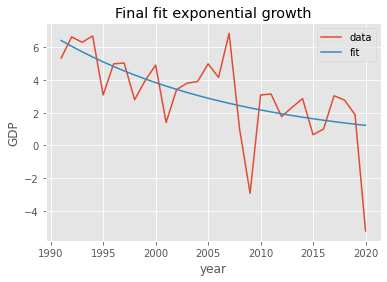

In [16]:
# fit exponential growth
popt, covar = opt.curve_fit(exp_growth, df1["index"],
df1["GDP growth"], p0=[4e8, 0.05])
# much better
print("Fit parameter", popt)
df1["GDP_exp"] = exp_growth(df1["index"], *popt)
plt.figure()
plt.plot(df1["index"], df1["GDP growth"], label="data")
plt.plot(df1["index"], df1["GDP_exp"], label="fit")
plt.legend()
plt.xlabel("year")
plt.ylabel("GDP")
plt.title("Final fit exponential growth")
plt.show()
print()


In [17]:
## # Using err_range.py file
from err_ranges import err_ranges
print("Forcasted GDP")
sigma = np.sqrt(np.diag(covar))

low, up = err_ranges(2030, exp_growth, popt, sigma)
print("2030 between ", low, "and", up)

Forcasted GDP
2030 between  0.040463720994599175 and 4.522950501380462


<center><h2> THE END